# Logistic Regression

Import Libraries

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Upload Raw Data

In [47]:
data = pd.read_csv('2.01. Admittance.csv')
data.head()

SAT Admitted
0  1363       No
1  1792      Yes
2  1954      Yes
3  1653       No
4  1593       No

In [48]:
raw_data = data.copy()

In [49]:
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})

In [50]:
data.head()

SAT  Admitted
0  1363         0
1  1792         1
2  1954         1
3  1653         0
4  1593         0

Declare Variables

In [100]:
y = data['Admitted']
x1 = data['SAT']

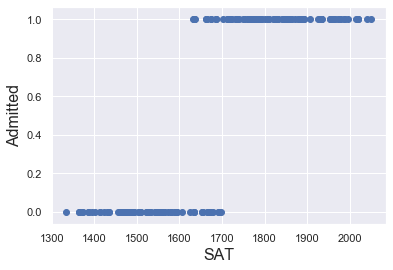

In [83]:
plt.scatter(x1,y, color='C0')
plt.xlabel('SAT', fontsize=16)
plt.ylabel('Admitted', fontsize=16)
plt.show()


# Plot with Regression Line

In [84]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)

In [85]:
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_line = sm.OLS(y,x)
results_line = reg_line.fit()

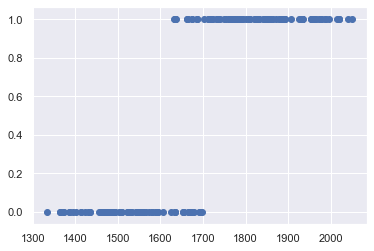

In [87]:
#Create a Scatter Plot
plt.scatter(x1,y, color ='C0')

In [88]:
results_line.params

const   -3.251859
SAT      0.002248
dtype: float64

In [89]:
y_hat = x1*results_line.params[1] + results_line.params[1]

In [91]:
y_hat.head()

0    3.066599
1    4.031094
2    4.395309
3    3.718589
4    3.583695
Name: SAT, dtype: float64

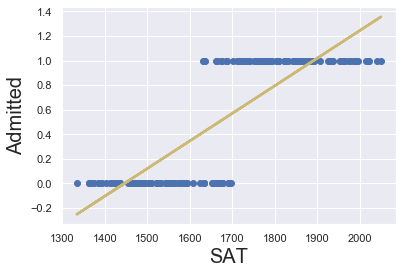

In [95]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_lin = sm.OLS(y,x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
results_lin = reg_lin.fit()

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

# Logistic Regression

In [104]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [105]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Sep 2019   Pseudo R-squ.:                  0.7992
Time:                        17:17:02   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Looking into LL-Null

In [107]:
#Create a variable with only ones
const = np.ones(168)
const

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [108]:
reg_null = sm.Logit(y,const)
results_null = reg_null.fit()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


In [109]:
results_null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Fri, 27 Sep 2019   Pseudo R-squ.:               7.410e-11
Time:                        17:19:29   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""